# 다중 선형 회귀

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 선형회귀 알고리즘
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df.drop(["ocean_proximity"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


### 상관관계 분석
- 상관분석은 두 변수 간에 어떤 선형적 관계를 갖고 있는지를 분석하는 방법
- 상관계수는 0.7이 넘으면 강한 양의 상관관계, -0.7 이하는 강한 음의 상관관계로 해석하며, 0에 가까울수록 상관관계가 없음

In [7]:
corr = df.corr(method='pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


Text(0.5, 1.0, 'housing data correlation')

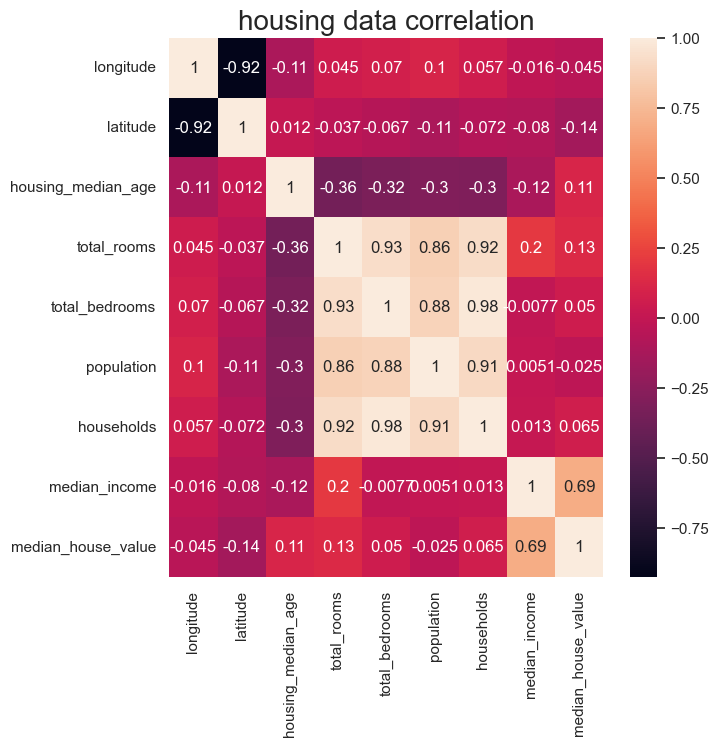

In [13]:
import seaborn as sns

sns.set(style="white")
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr, annot=True) # seabon의 히트맵을 주로 사용
plt.title("housing data correlation", size=20)

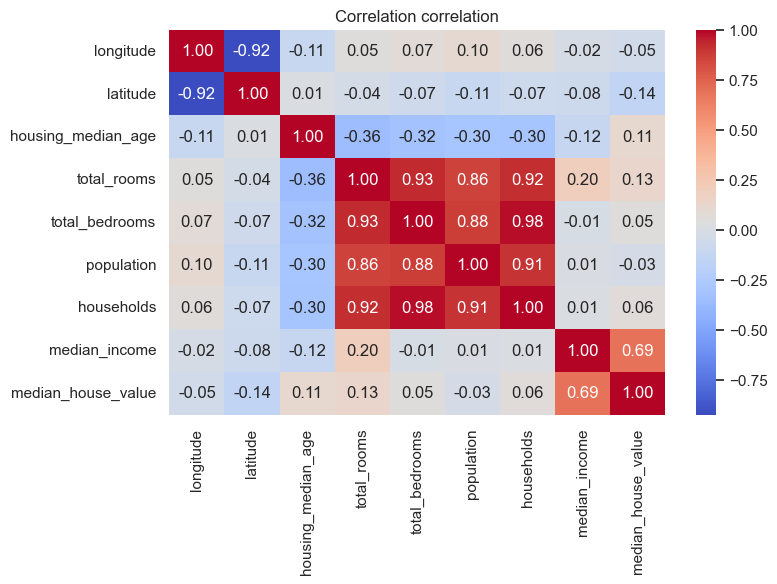

In [30]:
import seaborn as sns

plt.figure(figsize = (8,5))
sns.heatmap(corr,annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation correlation")
plt.show()

In [17]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16346, 8) (4087, 8) (16346,) (4087,)


In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("기울기 : ", lr.coef_)
print("y절편 : ", lr.intercept_)

기울기 :  [-4.30703394e+04 -4.28452565e+04  1.15340332e+03 -7.96971720e+00
  1.10803263e+02 -3.70362698e+01  4.71687242e+01  4.01017696e+04]
y절편 :  -3614535.2195803947


In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pred = lr.predict(X_test)

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

print("r2 score : ", r2)
print("평균 제곱 오차 MSE : ", mse)
print("평균 절대 오차 MAE : ", mae)
print("루트 평균 제곱 오차 RMSE : ",rmse)

r2 score :  0.6422553162715771
평균 제곱 오차 MSE :  4886128800.420783
평균 절대 오차 MAE :  50852.481078962766
루트 평균 제곱 오차 RMSE :  69900.84978325215
